
# Regressao Linear Simples

Quando utilizamos os modelos de Regressão? Quando queremos prever uma variável contínua, isto é, um valor numérico.

Nesse exercício de hoje, iremos aprender um pouco mais sobre a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) utilizando um dataset próprio dela para aplicarmos dentro do modelo de Regressão Linear.

Em linhas gerais, o objetivo do exercício é você desenvolver um modelo de Regressão Linear **SIMPLES** (Apenas uma variável de entrada X e uma de saída Y) para modelar a precificação de casas em Boston nos Estados Unidos. 

O objetivo desse exercicio é de importar os dados, criar um dataframe, realizar um EDA para descobrir os melhores atributos para utilizar como X (variáveis de entrada) do modelo, treinar o modelo para cada atributo e avaliar qual foi o melhor modelo

## Importação de bibliotecas e do dataset

In [45]:
from sklearn.datasets import load_boston #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
dataset = load_boston()

Dando uma olhada mais a fundo no tipo do dataset, vemos que ele é um *sklearn.utils.Bunch*, uma espécie de objeto do sklearn. Em seguida, acessaremos seus atributos e veremos o que eles significam.

In [2]:
# Verificando os atributos do objeto
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# Acessando o atributos do objeto
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [57]:
dataset['filename']

'C:\\Users\\Pc\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

Dentro dos atributos, vemos que o dataset é composto são:
- 'data': Os dados numéricos do dataset;
- 'target': A variável alvo (O que queremos prever);
- 'feature_names': Nome das colunas;
- 'DESCR': Descrição do arquivo;
- 'filename': Nome do arquivo e aonde ele está localizado;


## 1 - Criação do DataFrame


In [9]:
houses = pd.DataFrame(dataset.get('data'),columns=dataset.get('feature_names'))
houses["PRICE"] = dataset.get('target')
display(houses)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 2 - EDA

Nessa etapa devemos escolher quais serão as 3 melhores colunas para utilizarmos, atráves da análise exploratória de dados devemos decidir quais serão as colunas que terão maior impacto no preço de uma casa

### Gráfico de Dispersão

Text(0.5, 1.0, 'Dispersão - Property Tax x Price')

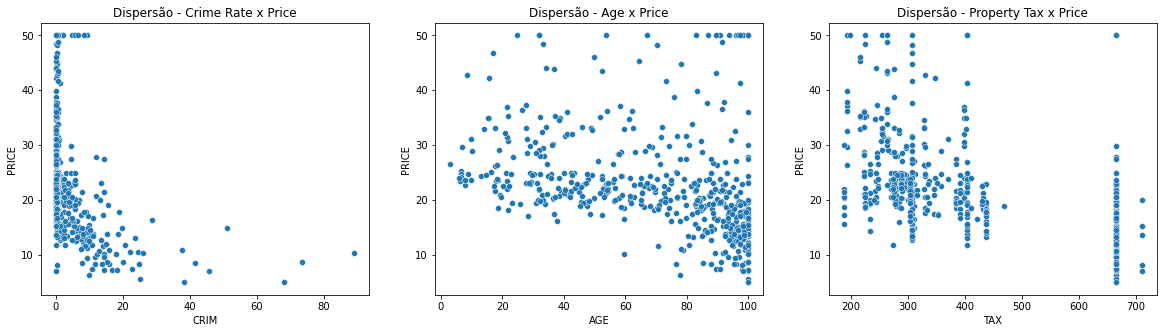

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='CRIM', y='PRICE', data=houses)
plt.title('Dispersão - Crime Rate x Price')

plt.subplot(1,3,2)
sns.scatterplot(x='AGE', y='PRICE', data=houses)
plt.title('Dispersão - Age x Price')

plt.subplot(1,3,3)
sns.scatterplot(x='TAX', y='PRICE', data=houses)
plt.title('Dispersão - Property Tax x Price')

### Gráfico de correlação

<AxesSubplot:>

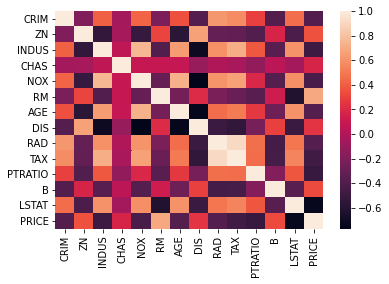

In [22]:
sns.heatmap(houses.corr())

In [25]:
houses.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

Text(0.5, 1.0, 'Correlação com o preço')

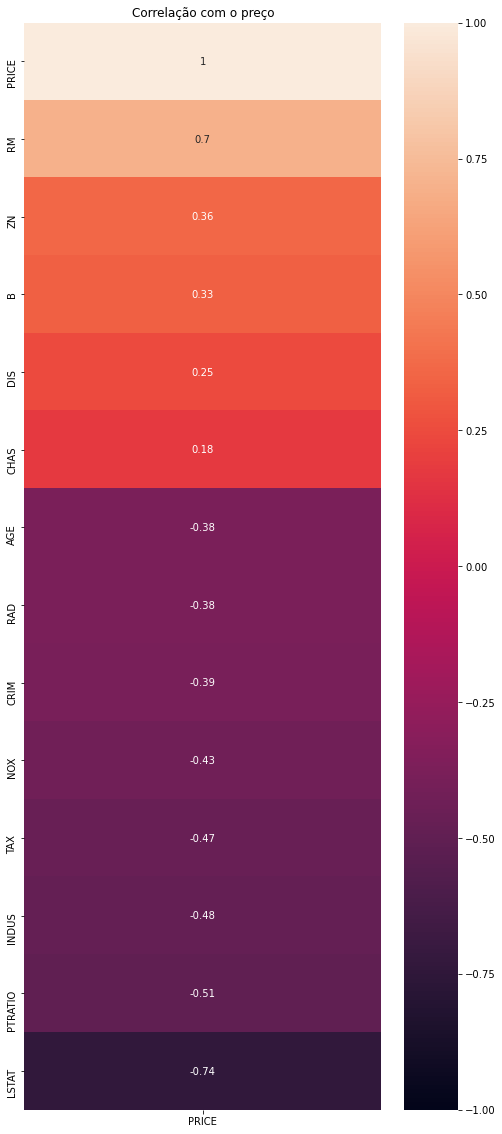

In [31]:
houses.corr()[['PRICE']].sort_values(by='PRICE', ascending=False)
plt.figure(figsize=(8,20))

heatmap = sns.heatmap(houses.corr()[['PRICE']].sort_values(by='PRICE', ascending=False),
                     vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlação com o preço')

Com base na correlação com a variável preço, escolhemos as variáveis LSTAT(% lower status of the population), RM(average number of rooms per dwelling), PTRATIO(pupil-teacher ratio by town)

## 3 - Separação Treino X Teste

In [35]:
X = houses[['LSTAT', 'RM', 'PTRATIO']]
y = houses['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [36]:
X_train.head()

,LSTAT,RM,PTRATIO
204,2.88,8.034,14.7
338,8.51,6.059,20.2
308,4.54,6.635,18.4
92,8.16,6.442,18.2
348,5.99,6.635,17.0


## 4 - Treinamentos e validação dos modelos

OBS: Atentar-se ao fato de que estamos analisando apenas modelos **SIMPLES** (um X e um y)
<br>
Calcular as métricas: fórmula de regressão, MSE, RMSE, R**2

In [47]:
#Chamar a função do modelo para cada variável
LinearRegression1 = LinearRegression() #Para o LSTAT 
LinearRegression2 = LinearRegression() #Para o RM
LinearRegression3 = LinearRegression() #Para o PTRATIO 

#Treinar o modelo
LinearRegression1.fit(X_train['LSTAT'].values.reshape(-1,1), y_train)

#Predizer os valores de teste 
y_pred_1 = LinearRegression1.predict(X_test['LSTAT'].values.reshape(-1,1))

#Calcular as métricas do modelo
print(f'Fórmula: y={LinearRegression1.intercept_} {LinearRegression1.coef_[0]} x')
print(f'MSE: {metrics.mean_absolute_error(y_test,y_pred_1)}')
print(f'RMSE: {metrics.mean_squared_error(y_test,y_pred_1)}')
print(f'RSquared: {metrics.r2_score(y_test,y_pred_1)}')

Fórmula: y=34.312084956274305 -0.9495586309792531 x
MSE: 4.695477422052554
RMSE: 40.74260551171826
RSquared: 0.5939445887483178


### Criar uma visualização do modelo

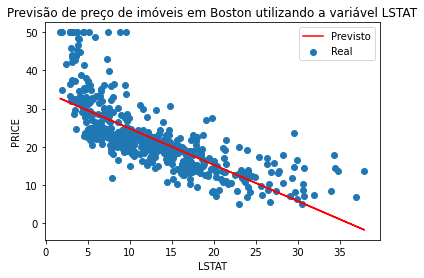

In [51]:
y_pred_total = LinearRegression1.predict(X['LSTAT'].values.reshape(-1,1))
plt.scatter('LSTAT', 'PRICE', data=houses, label='Real')
plt.plot(houses['LSTAT'], y_pred_total, label='Previsto', color='red')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável LSTAT')
plt.legend()

plt.show()

### Repetir o procedimento nas outras duas variáveis

#### RM

Fórmula: y=-35.36874254909549 9.21818958967234 x
MSE: 5.036430604592322
RMSE: 54.963194817348786
RSquared: 0.4522170981714504


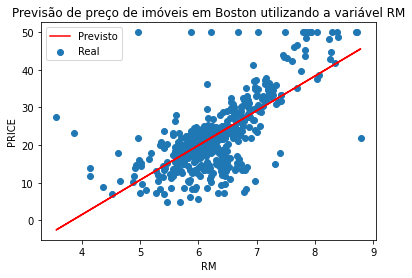

In [52]:
#Treinar o modelo
LinearRegression2.fit(X_train['RM'].values.reshape(-1,1), y_train)

#Predizer os valores de teste 
y_pred_2 = LinearRegression2.predict(X_test['RM'].values.reshape(-1,1))

#Calcular as métricas do modelo
print(f'Fórmula: y={LinearRegression2.intercept_} {LinearRegression2.coef_[0]} x')
print(f'MSE: {metrics.mean_absolute_error(y_test,y_pred_2)}')
print(f'RMSE: {metrics.mean_squared_error(y_test,y_pred_2)}')
print(f'RSquared: {metrics.r2_score(y_test,y_pred_2)}')

y_pred_total = LinearRegression2.predict(X['RM'].values.reshape(-1,1))
plt.scatter('RM', 'PRICE', data=houses, label='Real')
plt.plot(houses['RM'], y_pred_total, label='Previsto', color='red')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável RM')
plt.legend()

plt.show()

#### PTRATIO

Fórmula: y=60.88450743280619 -2.0841344724454074 x
MSE: 6.363709327674431
RMSE: 73.33269058380743
RSquared: 0.26914011857597353


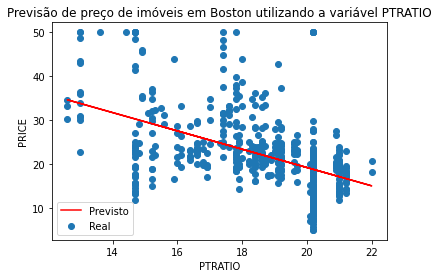

In [53]:
#Treinar o modelo
LinearRegression3.fit(X_train['PTRATIO'].values.reshape(-1,1), y_train)

#Predizer os valores de teste 
y_pred_3 = LinearRegression3.predict(X_test['PTRATIO'].values.reshape(-1,1))

#Calcular as métricas do modelo
print(f'Fórmula: y={LinearRegression3.intercept_} {LinearRegression3.coef_[0]} x')
print(f'MSE: {metrics.mean_absolute_error(y_test,y_pred_3)}')
print(f'RMSE: {metrics.mean_squared_error(y_test,y_pred_3)}')
print(f'RSquared: {metrics.r2_score(y_test,y_pred_3)}')

y_pred_total = LinearRegression3.predict(X['PTRATIO'].values.reshape(-1,1))
plt.scatter('PTRATIO', 'PRICE', data=houses, label='Real')
plt.plot(houses['PTRATIO'], y_pred_total, label='Previsto', color='red')
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável PTRATIO')
plt.legend()

plt.show()

## Criando uma função para escalar o procedimento realizado anteriormente

Fórmula: y = 34.312084956274305 -0.9495586309792531 x
MSE: 4.695477422052554
RMSE: 40.74260551171826
R²: 0.5939445887483178


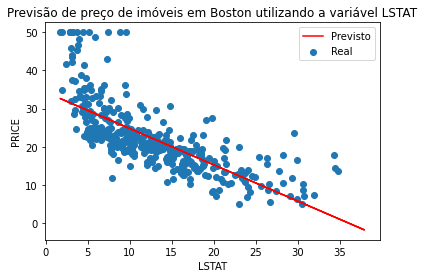

Fórmula: y = -35.36874254909549 9.21818958967234 x
MSE: 5.036430604592322
RMSE: 54.963194817348786
R²: 0.4522170981714504


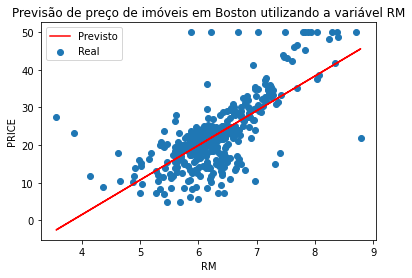

Fórmula: y = 60.88450743280619 -2.0841344724454074 x
MSE: 6.363709327674431
RMSE: 73.33269058380743
R²: 0.26914011857597353


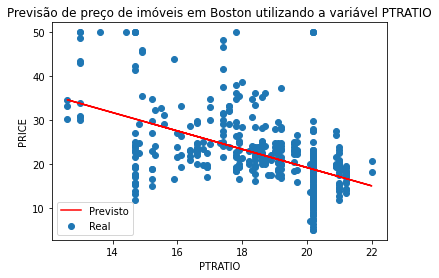

In [55]:
# Chamar a função do Modelo
LinReg = LinearRegression() # Para o LSTAT


for i in X.columns:
  # Treinar o modelo
  LinReg.fit(X_train[i].values.reshape(-1,1),y_train)

  # Predizer os valores de teste
  y_pred = LinReg.predict(X_test[i].values.reshape(-1,1))

  # Calcular as métricas do modelo
  print("Fórmula: y = {} {} x".format(LinReg.intercept_,LinReg.coef_[0]))
  print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
  print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
  print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

  #X_norm = scaler.transform(X[i])

  y_pred_total = LinReg.predict(X[i].values.reshape(-1,1))
  plt.scatter(X_train[i],y_train,label='Real')
  plt.plot(X[i],y_pred_total,label='Previsto',color='red')
  plt.xlabel(i)
  plt.ylabel('PRICE')
  plt.title('Previsão de preço de imóveis em Boston utilizando a variável ' + i)
  plt.legend()

  plt.show()

## Qual o melhor modelo?
De acordo com as informações gráficas e das métricas vistas acima, podemos ver que o melhor modelo foi aquele que utilizou a variável LSTAT